# Importing Images 

This was one of the first use cases that sold me on the value of Keras. For image
classification or regression, you will often need to import images with some
underlying directory structure. My initial approach to handling this on an assigment
was to write my own functions to traverse the directory and parse images / classes
as required for the assignment. I eventually discovered that Keras provides high
level APIs to automate this entire process using a few lines of code.

**Note**: See [documentation](https://keras.io/preprocessing/image/) for reference

A minimal version of Tiny Imagenet is included in this directory, 
where only one image of each class is included. 

We can view the directory structure...

In [1]:
import os
DATASET_ROOT = './tiny_imagenet_minimal'

def print_dir_tree(path):
    count = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            print(os.path.join(root, name))
            count += 1
            if count == 5:
                print('...')
                return
print_dir_tree(DATASET_ROOT)

./tiny_imagenet_minimal/n02814533/images/n02814533_0.JPEG
./tiny_imagenet_minimal/n02509815/images/n02509815_0.JPEG
./tiny_imagenet_minimal/n02002724/images/n02002724_0.JPEG
./tiny_imagenet_minimal/n04067472/images/n04067472_0.JPEG
./tiny_imagenet_minimal/n02791270/images/n02791270_0.JPEG
...


We see that the training set contains 200 directories corresponding to the 200 
classes in Tiny Imagenet. Within each directory is an `images` directory that
contains the individual `JPEG` images of that class.

We will begin by creating an `ImageDataGenerator` object as follows.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        data_format='channels_last',
        samplewise_center=True,
        samplewise_std_normalization=True,
        horizontal_flip=True,
        rescale=1./255
)

The passed arguments:

 * `samplewise_center=True` - Normalize to zero mean
 * `samplewise_std_normalization=True` - Normalize to unit variance
 * `horizontal_flip=True` - Flip images
 * `data_format='channels_last'` - Output tensors should have channels as last dimension
 * `rescale=1./255` - Rescale 8 bit images to a float on [0, 1]

The constructor also allows one to specify a custom preprocessing function to run 
after the above operations. We have just defined a generator, but no processing
has actually been performed. Tensorflow has added the file reading operations and
the pre-processing steps we specified to the computational graph.

Next we use the `flow_from_directory` method which automatically
interprets the file structure of the training set and returns an iterator
over training files. Our preprocessing operations will be applied as files are pulled 
from this iterator as tuples of image label pairs. The arguments are mostly trivial. 
We specify a `class_mode='sparse'` such that an argmax integer is produced for labels, 
rather than a one hot vector. 

In [3]:
train_generator = train_datagen.flow_from_directory(
        DATASET_ROOT,
        target_size=(64, 64),
        batch_size=4,
        class_mode='sparse'
)

Found 200 images belonging to 200 classes.


We get a nice output stating the number of images and classes that were detected.

We can then plot the images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


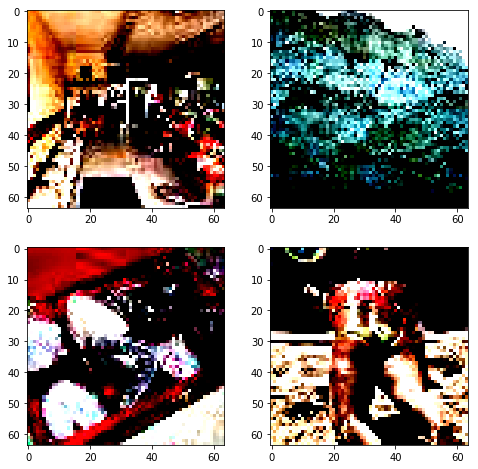

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def plot_images(img_iter, rows=2, cols=2):
    fig=plt.figure(figsize=(8, 8))
    img_iter = img_iter[:rows*cols]
    for i, img in enumerate(img_iter):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img)
    plt.show()
    return img_iter

img_bat, label_bat = train_generator.next()
_ = plot_images(img_bat)

Note that some of the images look strange - the yielded images have had their
preprocessing operations applied.

Later demos will show exactly how to apply this workflow to training models.
The brief explanation is that the generator we created can be used for any Keras 
call that accepts a generator as an input argument. Similarly, we can use this
generator to offer training examples as inputs for TFRecord generation.